Domicile Data:
After dropping column 'id':
Accuracy =  1.0
[[8.7 2.5]]
Prediction on example measure =  [33]


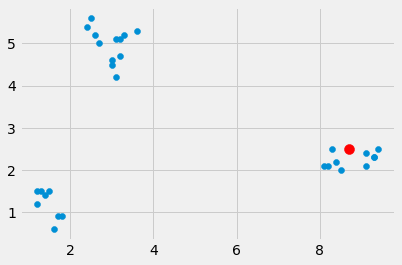

In [62]:
# This problem definition is created to be an example of KNN with my own data
# This program addresses if a person is A - American(Country code = 11), 
#                                       B - British(Country code = 22), 
#                                       C - Canada(Country code = 33) 
# by examining the person's red blood cell count, complexion
# The problem definition and data are created by me

import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

# Data prepared on my own using the online free graph tools
#   https://www.mathsisfun.com/data/cartesian-coordinates-interactive.html or
#   https://oercommons.s3.amazonaws.com/media/courseware/relatedresource/file/imth-6-1-9-6-1-coordinate_plane_plotter/index.html
df = pd.read_csv('domicile.csv')
print("Domicile Data:")
df

df.drop(['id'], 1, inplace=True)
#print("After dropping column 'id':")
#print(df)

ages = df['age']
complexions = df['complexion']
countries = [11, 22, 33]

#print("Ages:\n", ages)
#print("Complexions:\n", complexions)
#print("Countries:\n", countries)

X = np.array(df.drop(['country'], 1)) # Consider all columns as features except 'country'
y = np.array(df['country']) # Consider the column 'country' as it will be our 'Label'

#print("Values of X:")
#X

#print("Values of y:")
#y

# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test

# Select the KNeighbors classifier
clf = neighbors.KNeighborsClassifier()

# Fit the model on training data
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print("Accuracy = ", accuracy)

# Apply the model on a fictitious sample measure for prediction
ex_measures = np.array([8.7, 2.5])
ex_measures = ex_measures.reshape(1, -1) # convert single dim array to two-dim array as our orginal array was two-dim
print(ex_measures)

prediction = clf.predict(ex_measures)
print("Prediction on example measure = ", prediction)

plt.scatter(ages, complexions) 
plt.scatter(ex_measures[0][0], ex_measures[0][1], s=100, color='r')